<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Thanks for taking the time to improve the project! I added a couple more comments with some information which should be of interest to you (about references vs copies and time series cross-validation). The project is accepted. Keep up the great work on the next sprint!

</div>

**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there is a problem with data leakage that needs to be fixed before the project is accepted. Let me know if you have questions!

# Project description

Sweet Lift Taxi company has collected historical data on taxi orders at airports. To attract more drivers during peak hours, we need to predict the amount of taxi orders for the next hour. Build a model for such a prediction.

The RMSE metric on the test set should not be more than 48.

## Project instructions

1. Download the data and resample it by one hour.
2. Analyze the data.
3. Train different models with different hyperparameters. The test sample should be 10% of the initial dataset. 
4. Test the data using the test sample and provide a conclusion.

## Data description

The data is stored in file `taxi.csv`. The number of orders is in the '*num_orders*' column.

## Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

### Download Data

In [2]:
df = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

### Overview of Raw Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Data has been loaded in with the dates converted the the proper data type and set to be the index.

In [5]:
df.sort_index(inplace=True)
df = df.resample('1H').sum()

<div class="alert alert-success">
<b>Reviewer's comment</b>

Good idea to make sure the time series is sorted. Resampling is done correctly

</div>

In [6]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


Index `datetime` has been grouped by the hour, with the total number/sum of the orders represented.

In [7]:
df.isna().sum()

num_orders    0
dtype: int64

There are no missing values.

In [8]:
data = df ### Clean data set for use in model creation after analysis

## Analysis

### Data Overview

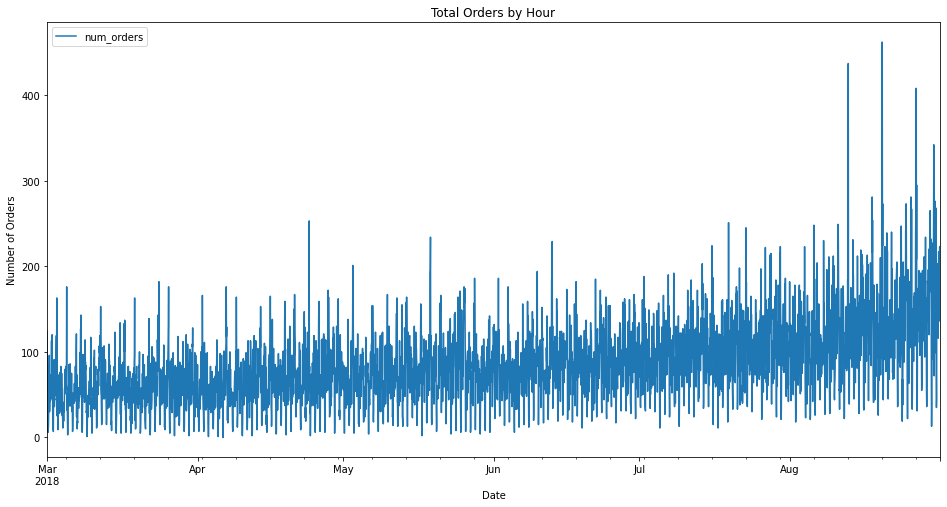

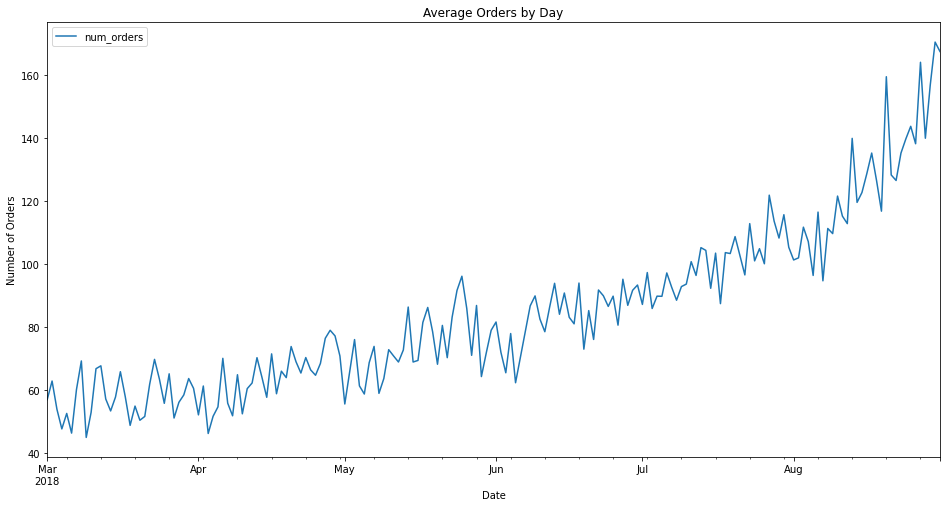

In [9]:
df.plot(figsize=(16,8),
        xlabel='Date',
        ylabel='Number of Orders',
        title='Total Orders by Hour'
       )

plt.show() 

df2 = df.resample('1D').mean()
df2.plot(figsize=(16,8),
         xlabel='Date',
         ylabel='Number of Orders',
         title='Average Orders by Day'
        )

plt.show() 

The first graph shows the hourly data, and there appears to be a slightly upward trend. The second graph shows the average number of orders in a day in the same time period and displays the upward trend more significantly. 

We will look further at the decomposed data for sesonality and trend to see if this observation of the trend is confirmed.

### Trend and Seasonality

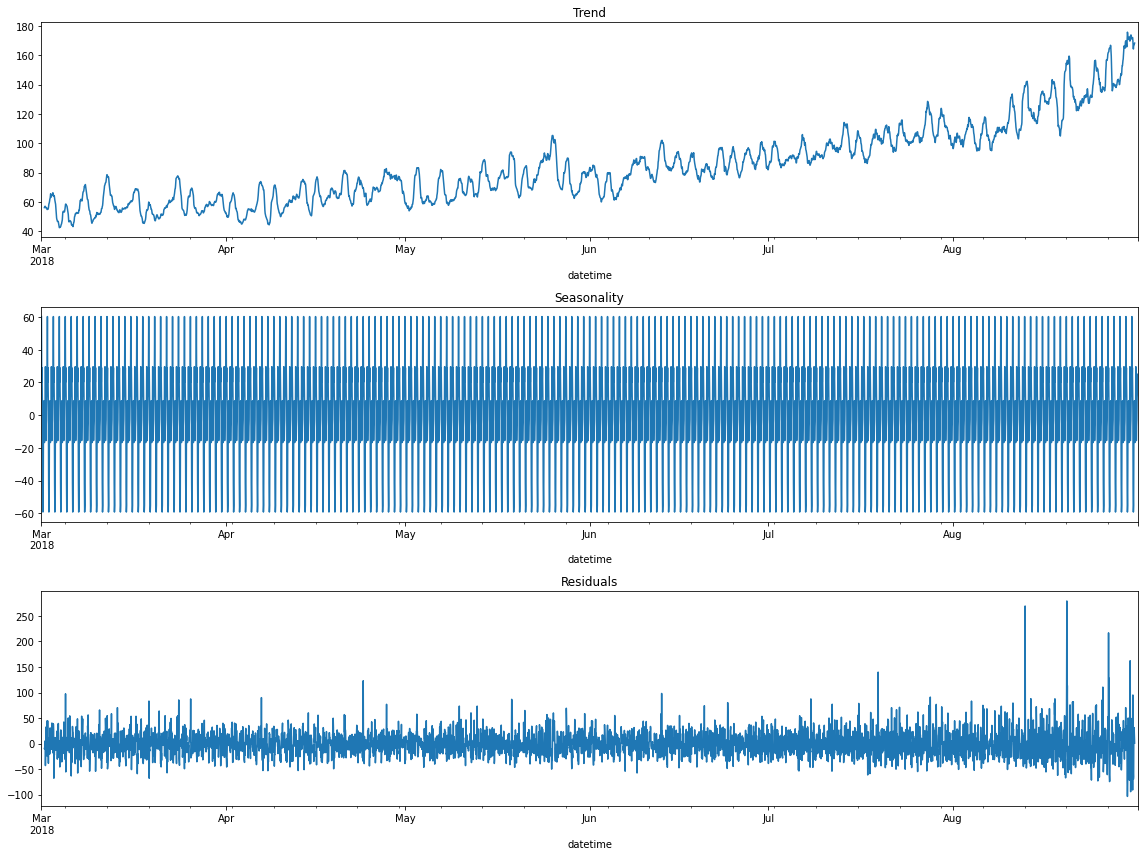

In [10]:
decomposed = seasonal_decompose(df, 'additive')

plt.figure(figsize=(16, 12))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')


plt.tight_layout() 

There is an upward trend in the data indicating an increasing number of rides over the span of March 2018 to the end of August 2018. This is a confirmation of our initial observation at the graphs built from the data.

The display of seasonal data does not show a repeating pattern over the span of months, and because there data only spans five months, we are unable to see if there are yearly patterns. We will look at a slice of the seasonal decomposition data to see if there are daily patterns.

Residuals represent compuational artifacts, and thus don't carry significance for analysis.

### Daily Seasonality

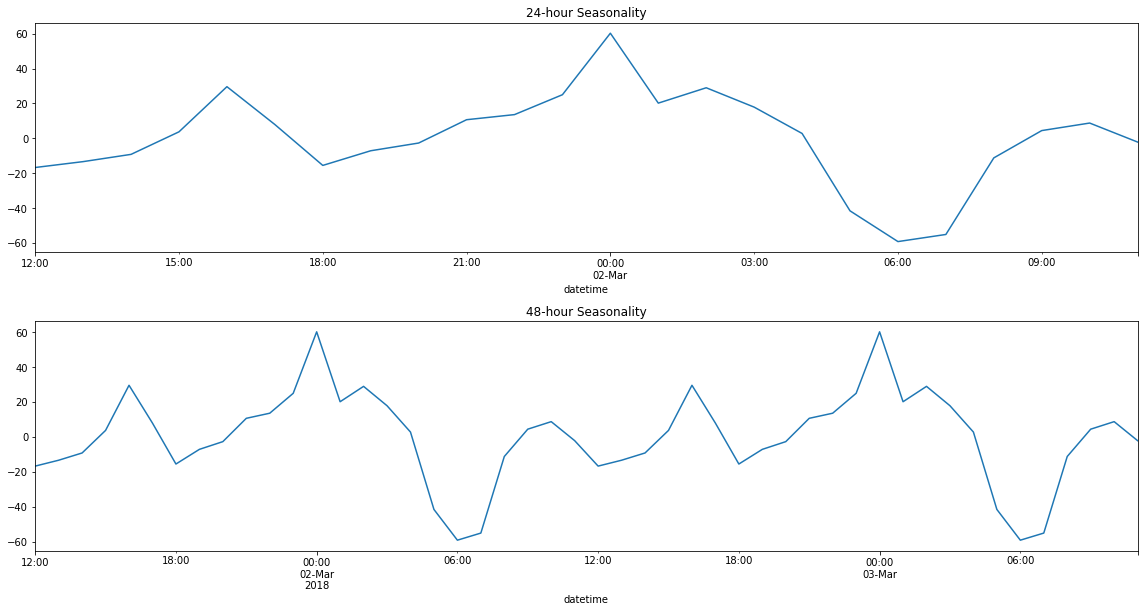

In [11]:
plt.figure(figsize=(16, 12))

plt.subplot(311)
decomposed.seasonal[12:36].plot(ax=plt.gca())
plt.title('24-hour Seasonality')
plt.subplot(312)
decomposed.seasonal[12:60].plot(ax=plt.gca())
plt.title('48-hour Seasonality')

plt.tight_layout() 

There is a pattern, or seasonality, in the data that could not be represented properly with the whole set.

The first graph being one day, and second being two, both show peaks at midnight and around 4-5 pm. The lowest activity being at 6 to 7 am.

### Rolling Metrics

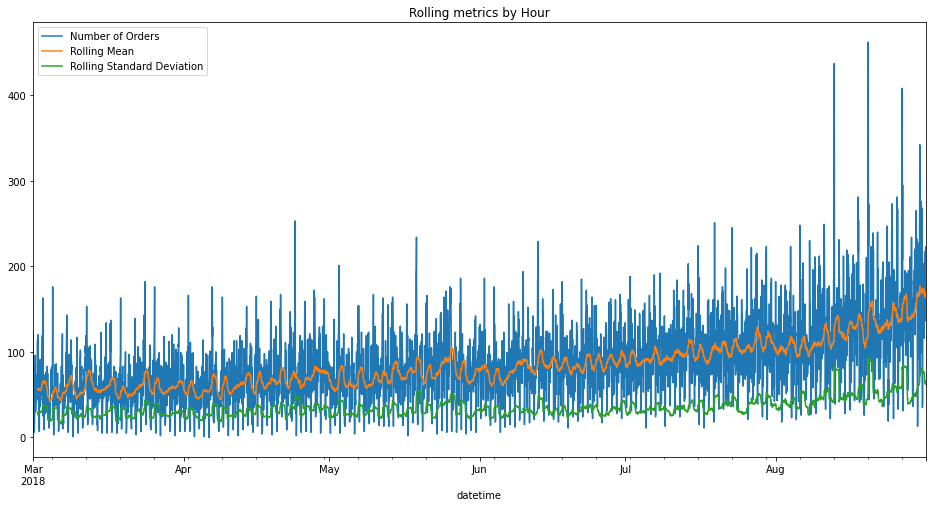

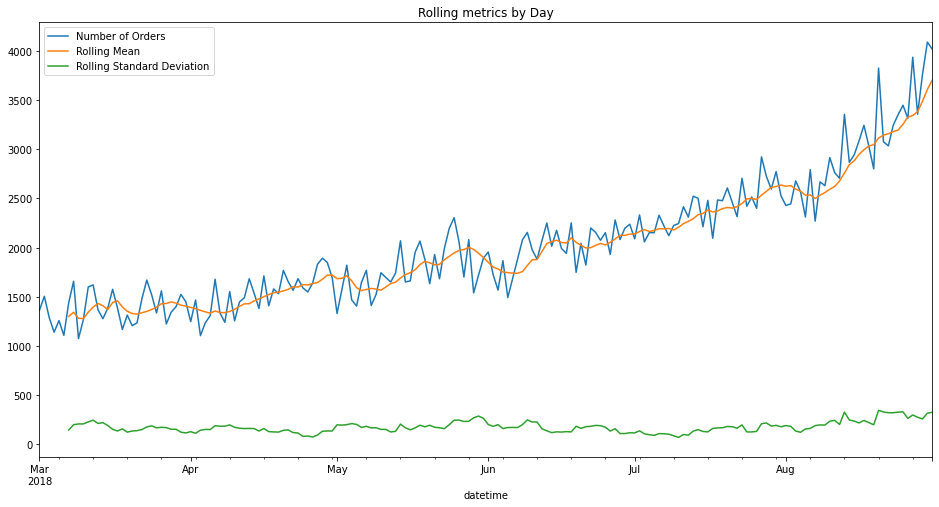

In [12]:
df3 = df
df3['mean'] = df3['num_orders'].rolling(24).mean()
df3['std'] = df3['num_orders'].rolling(24).std()

df3.plot(figsize=(16, 8), title='Rolling metrics by Hour') 
plt.legend(['Number of Orders', 'Rolling Mean', 'Rolling Standard Deviation'])

df4 = df.resample('1D').sum()
df4['mean'] = df4['num_orders'].rolling(7).mean()
df4['std'] = df4['num_orders'].rolling(7).std()

df4.plot(figsize=(16, 8), title='Rolling metrics by Day')
plt.legend(['Number of Orders', 'Rolling Mean', 'Rolling Standard Deviation'])

The rolling mean and rolling standard deviation only go to confirm our previous observation about the upward trend, but also show that though there are the hourly spikes in activity, primarily at the low point at 6 to 7 in the morning, the increase is quite steady without any shocking spikes or dips over the five month period of the data.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Very nice EDA! You noted soem trends and patterns in the data.

</div>

## Training

### Creating Features for Forecasting

In [16]:
data = data.drop(['mean', 'std'], axis=1)
data['month'] = data.index.month
data['day'] = data.index.day
data['day_of_week'] = data.index.dayofweek
data['hour'] = data.index.hour

for lag in range(1,25):
    data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    
data['rolling_mean'] = data['num_orders'].shift().rolling(72).mean() ### Mean for 3 day period

<div class="alert alert-success">
<b>Reviewer's comment</b>

Feature engineering looks good: there are calendar features, lag features and a shifted rolling mean

</div>

In [17]:
data = data.dropna()
data.head()

,num_orders,month,day,day_of_week,hour,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-04 00:00:00,75,3,4,6,0,43.0,63.0,48.0,83.0,30.0,...,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,163.0,57.777778
2018-03-04 01:00:00,60,3,4,6,1,75.0,43.0,63.0,48.0,83.0,...,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,108.0,57.097222
2018-03-04 02:00:00,26,3,4,6,2,60.0,75.0,43.0,63.0,48.0,...,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,25.0,56.750000
2018-03-04 03:00:00,42,3,4,6,3,26.0,60.0,75.0,43.0,63.0,...,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,64.0,56.125000
2018-03-04 04:00:00,27,3,4,6,4,42.0,26.0,60.0,75.0,43.0,...,32.0,57.0,52.0,73.0,56.0,17.0,9.0,15.0,44.0,55.791667


<div class="alert alert-danger">
<s><b>Reviewer's comment</b>

`mean` and `std` columns which were calculated using targets (i.e. the `shift()` was not applied) need to be removed to avoid data leakage: `mean` is a linear combination of the target and lag features, so linear regression can find the exact target value from them. This is the reason its error is so low

</div>

<div class="alert alert-info">
I've removed mean and std. I thought I had taken care of that by copying my initial df to data before the analysis because I ran into the two columns being present in df afterwards, and rather than dropping them tried to utilized a clean dataset from the start of the model crafting. I have no clue how data would have gotten the mean and std columns as it's not touched after its creation until this point in the project - even double checked my code between data's creation and here and I haven't the slightest idea why the two columns would be present.
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Oh, I got it. Sorry, I completely missed that you tried to copy your initial df to a different variable. The problem is that the assignment `data = df` does not do any actual copying, it just creates a *reference* to `df` (basically a sign that points to it). To create an actual copy which would not be affected by the changes in `df`, you need to do something like `data = df.copy()`. Also see [this example](https://www.programiz.com/python-programming/shallow-deep-copy) about generic python objects and not just dataframes.
    
It's great that we've caught this problem, as it's important to know about the difference between creating a reference and a copy!

</div>

### Splitting Data

In [18]:
train_valid, test = train_test_split(data, shuffle=False, test_size=0.1)
train, valid = train_test_split(train_valid, shuffle=False, test_size=0.1)

In [19]:
print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-04 00:00:00 2018-07-28 13:00:00
2018-07-28 14:00:00 2018-08-13 20:00:00
2018-08-13 21:00:00 2018-08-31 23:00:00


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train, validation and test sets without shuffling

</div>

In [20]:
features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_valid = valid.drop(['num_orders'], axis=1)
target_valid = valid['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

### Training Models

#### Linear Regression

In [21]:
lr_model = LinearRegression()
lr_model.fit(features_train, target_train)

lr_predict_train = lr_model.predict(features_train)
lr_train_score = mean_squared_error(target_train, lr_predict_train, squared=False)

lr_predict_valid = lr_model.predict(features_valid)
lr_valid_score = mean_squared_error(target_valid, lr_predict_valid, squared=False)

print('RMSE of Training Set:', lr_train_score)
print('RMSE of Validation Set:', lr_valid_score)

RMSE of Training Set: 24.65711867987051
RMSE of Validation Set: 34.001540237082956


<AxesSubplot:>

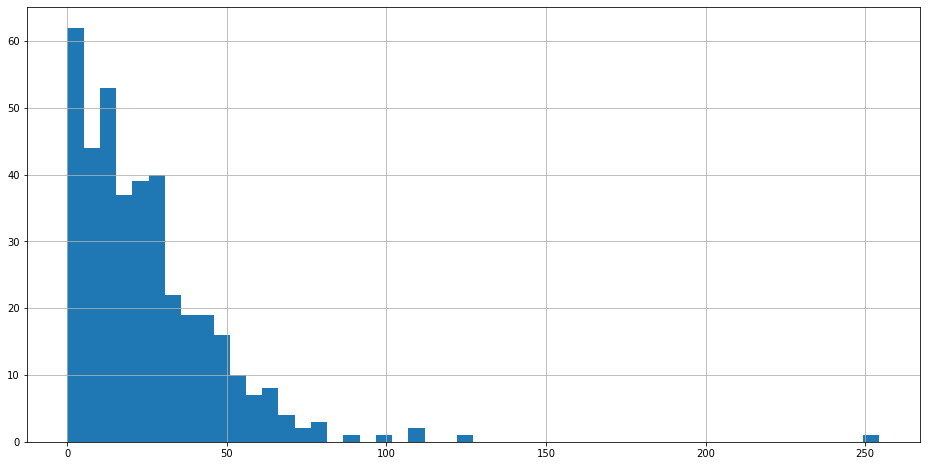

In [22]:
np.abs(target_valid - lr_predict_valid).hist(bins=50, figsize=(16,8))

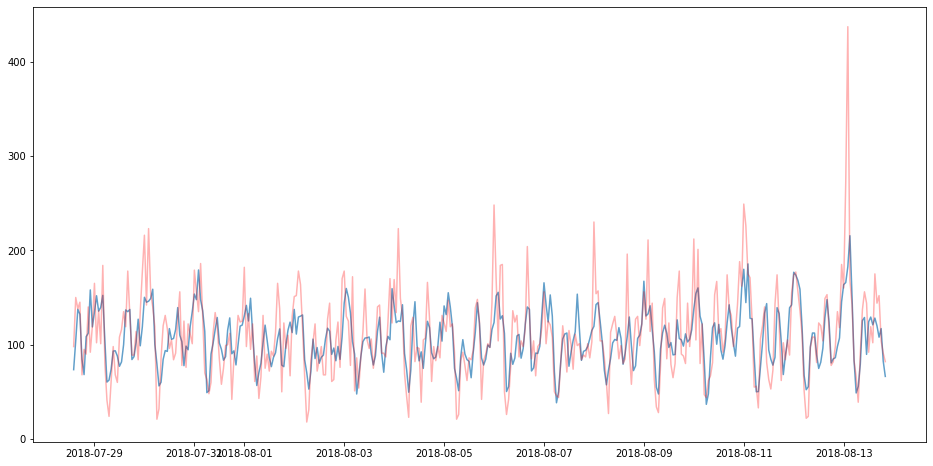

In [23]:
plt.figure(figsize=(16,8))
plt.plot(features_valid.index, lr_predict_valid, alpha=0.7)
plt.plot(features_valid.index, target_valid, color='red', alpha=0.3)

#### Decision Tree Regressor

In [24]:
dtr_model = None
best_score = 100000
best_depth = 0
for depth in range(1, 15):
    model = DecisionTreeRegressor(max_depth=depth, random_state=759638)
    model.fit(features_train, target_train)
    predict_train = model.predict(features_train)
    train_score = mean_squared_error(target_train, predict_train, squared=False)
    predict_valid = model.predict(features_valid)
    score = mean_squared_error(target_valid, predict_valid, squared=False)
    if abs(score) < abs(best_score):
        dtr_model = model
        best_score = score
        dtr_train_score = train_score
        best_depth = depth
        dtr_predicted = predict_valid
        
print("Best Depth:", best_depth)
print("RMSE of Training Set:", dtr_train_score)
print("RMSE of Validation Set:", best_score)

Best Depth: 7
RMSE of Training Set: 20.218973188205243
RMSE of Validation Set: 35.598712843336344


<AxesSubplot:>

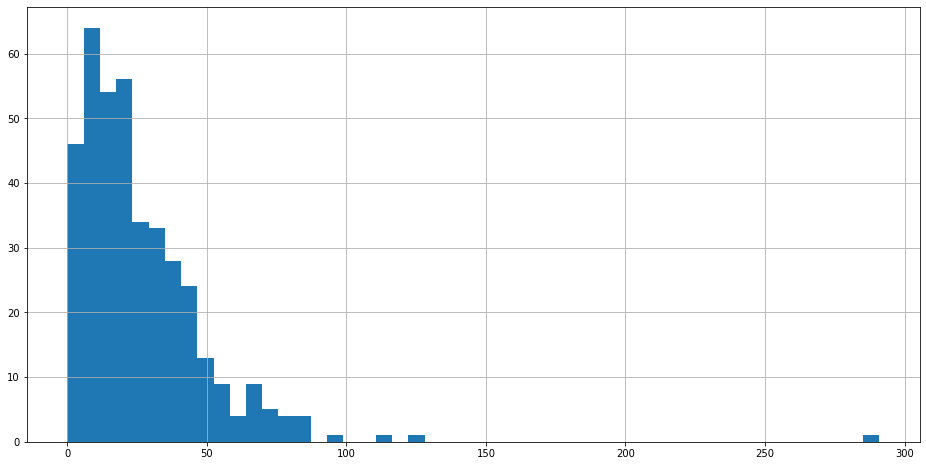

In [25]:
np.abs(target_valid - dtr_predicted).hist(bins=50, figsize=(16,8))

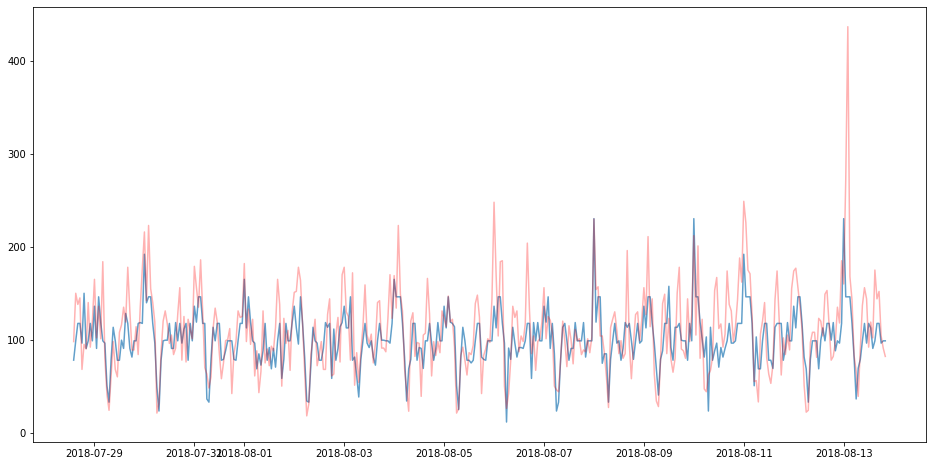

In [26]:
plt.figure(figsize=(16,8))
plt.plot(features_valid.index, dtr_predicted, alpha=0.7)
plt.plot(features_valid.index, target_valid, color='red', alpha=0.3)

#### Random Forest Regressor

In [27]:
rfr_model = None
best_score = 10000
best_est = 0
best_depth = 0
for est in range(35, 45, 1):
    for depth in range (10, 20):
        model = RandomForestRegressor(random_state=759638, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predict_train = model.predict(features_train)
        train_score = mean_squared_error(target_train, predict_train, squared=False)
        predict_valid = model.predict(features_valid)
        score = mean_squared_error(target_valid, predict_valid, squared=False)
        if abs(score) < abs(best_score):
            rfr_model = model
            best_score = score
            rfr_train_score = train_score
            best_est = est
            best_depth = depth
            rfr_predicted = predict_valid

print("Best Estimators:", best_est)
print("Best Depth:", best_depth)
print("RMSE of Training Set", rfr_train_score)
print("RMSE of Validation Set:", best_score)

Best Estimators: 36
Best Depth: 19
RMSE of Training Set 8.397802771329653
RMSE of Validation Set: 31.51730155223595


<AxesSubplot:>

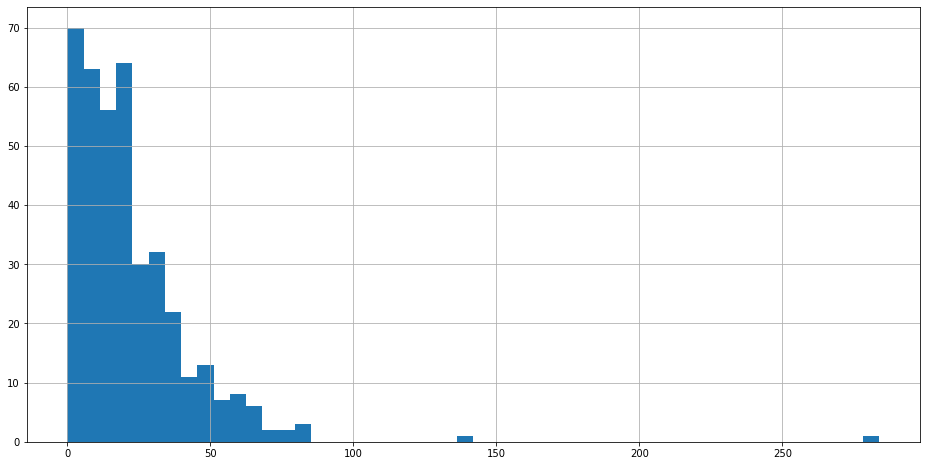

In [28]:
np.abs(target_valid - rfr_predicted).hist(bins=50, figsize=(16,8))

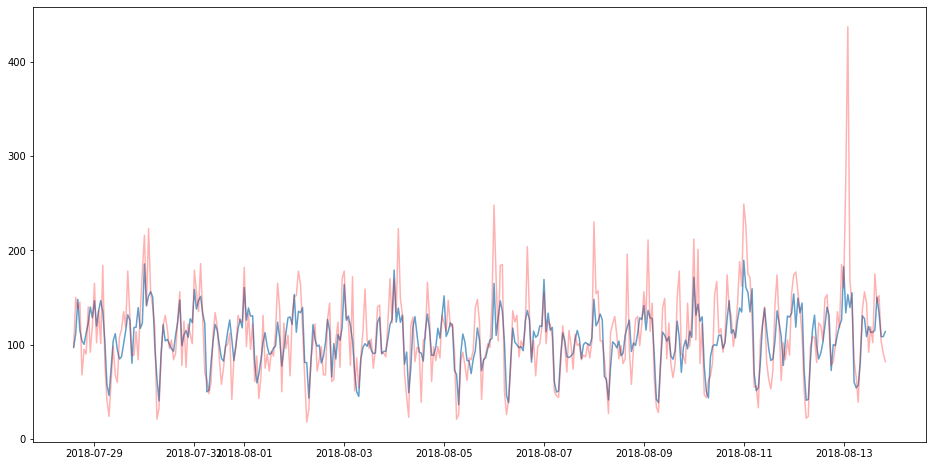

In [29]:
plt.figure(figsize=(16,8))
plt.plot(features_valid.index, rfr_predicted, alpha=0.7)
plt.plot(features_valid.index, target_valid, color='red', alpha=0.3)

All the models performed quite well in their training with the following RMSE results:

- Linear Regression test data RMSE = 24.65711867987051

- Linear Regression validation data RMSE = 34.001540237082956

- Decission Tree Regressor test data RMSE = 20.218973188205243

- Decission Tree Regressor validation data RMSE = 35.598712843336344

- Random Forest Regressor test data RMSE = 8.397802771329653

- Random Forest Regressor validation data RMSE = 31.51730155223595

The best of the models based on the RMSE on the validation set data was the Random Forest Regressor. Though both the Linear Regression and Decision Tree Regressor produced good RMSE values and run faaster, the Random Forest Regressor offers the best chance of forecasting accurately.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Great, you tried a few different models, did some hyperparameter tuning and compared the results using the validation set. Nice visualization of predictions!

</div>

## Testing

In [33]:
features_tv = train_valid.drop(['num_orders'], axis=1)
target_tv = train_valid['num_orders']

In [34]:
model = RandomForestRegressor(random_state=759638, n_estimators=36, max_depth=19)
model.fit(features_tv, target_tv)
rfr_prediction = model.predict(features_test)
rfr_test_score = mean_squared_error(target_test, rfr_prediction, squared=False)

print("RMSE of Test Set:", rfr_test_score)

RMSE of Test Set: 44.72326550983603


<AxesSubplot:>

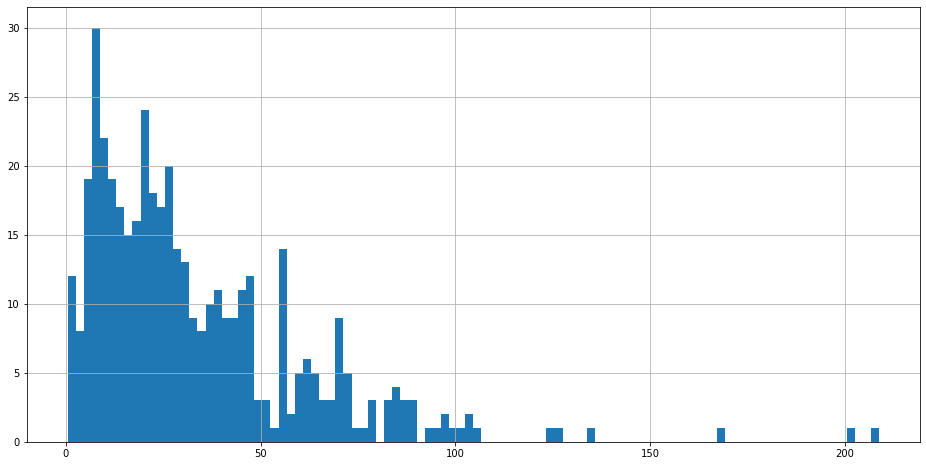

In [31]:
np.abs(target_test - rfr_prediction).hist(bins=100, figsize=(16,8))

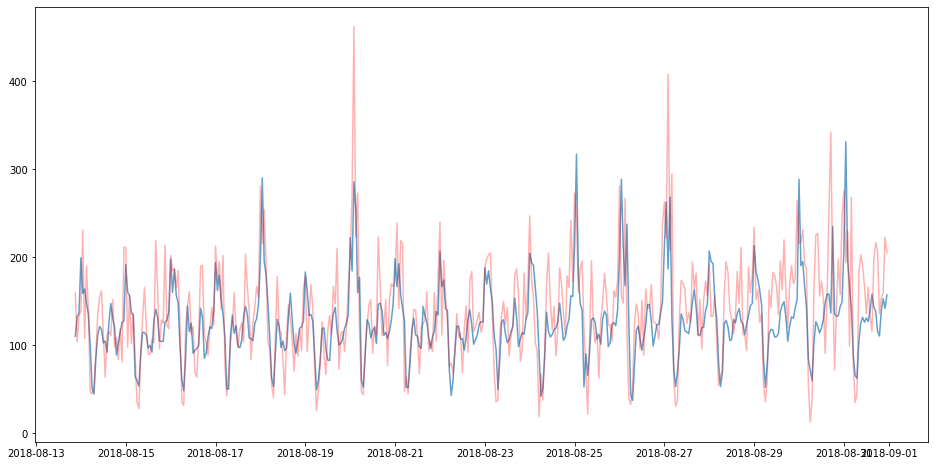

In [35]:
plt.figure(figsize=(16,8))
plt.plot(features_test.index, rfr_prediction, alpha=0.7)
plt.plot(features_test.index, target_test, color='red', alpha=0.3)

<div class="alert alert-success">
<b>Reviewer's comment</b>

The final model was evaluated on the test set and it beats the RMSE threshold

</div>

## Conclusion

The final Random Forest Regressor has been tested and assessed with respectable a RMSE value of `44.72326550983603` placing it under the set threshold of `48`. 

On the histogram above, we can see that the differences between the targets of the testing data and predicted values are concentrated on the low end, of the spectrum. Using the line graph, the blue representing the predictions, and red the actual test data, we can see that the model was generally more conservative in its predictions. Though we would like the accuraacy of the model to be perfect, the result ended up being quite close and usable for the forecasting the quantity of ordered rides for Sweet Lift Taxi.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Excellent!

</div>

<div class="alert alert-info">
I've taken care of the data leakage, and updated what I've needed to with the new results and hyperparameters for the final model. And the best part, even after the data leakage was solved, I still manage an RMSE under 48. Thanks for your time and feedback!
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Awesome! You're welcome! :)
    
By the way, in case you've wondered whether you can use cross-validation with time series models, you can, just not the regular k-fold cross-validation (as it would cause data leakage due to mixing of train and validation data in all folds but one). [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html) is an appropriate cross-validation scheme for time series models. To use it with `cross_val_score`, `GridSearchCV` and so on you can just pass an object of `TimeSeriesSplit` class as the `cv` parameter. You can find a visualization of how it splits the data [here](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

</div>

# Review checklist

- [x]  Jupyter Notebook is open
- [x]  The code is error-free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The data has been analyzed
- [x]  The model has been trained and hyperparameters have been selected
- [x]  The models have been evaluated. Conclusion has been provided
- [x] *RMSE* for the test set is not more than 48